In [192]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [193]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [196]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [197]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#load data
data = pd.read_csv('GDP by Country 1999-2022.csv', decimal = ',')

data = data.replace({'\"' :''}, regex=True)
data = data.replace({',' :''}, regex=True)
#display(data)

data = data.astype({'1999' : 'float', '2022' : 'float'})

#observe data
data.describe(include = 'all')

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,180,180.000000,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180.000000
unique,180,NaN,180,178,180,178,180,180,180,180,180,180,180,180,180,180,168,167,165,167,167,167,166,NaN
top,Afghanistan Rep. of.,NaN,0,7.894,4.084,4.585,5.971,7.309,8.399,9.892,11.513,13.318,15.406,19.248,21.555,24.304,0,0,0,0,0,0,0,NaN
freq,1,NaN,1,2,1,2,1,1,1,1,1,1,1,1,1,1,13,14,14,14,14,14,15,NaN
mean,NaN,171.770611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556.795356
std,NaN,799.068940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2387.937378
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,1.898750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.885000
50%,NaN,8.223500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.186000
75%,NaN,62.956000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.180250


C:\Users\kayla\AppData\Local\Temp\ipykernel_10128\2371076926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Country', y = '2022', data = top_10_GDP_2022, palette = 'Set1')


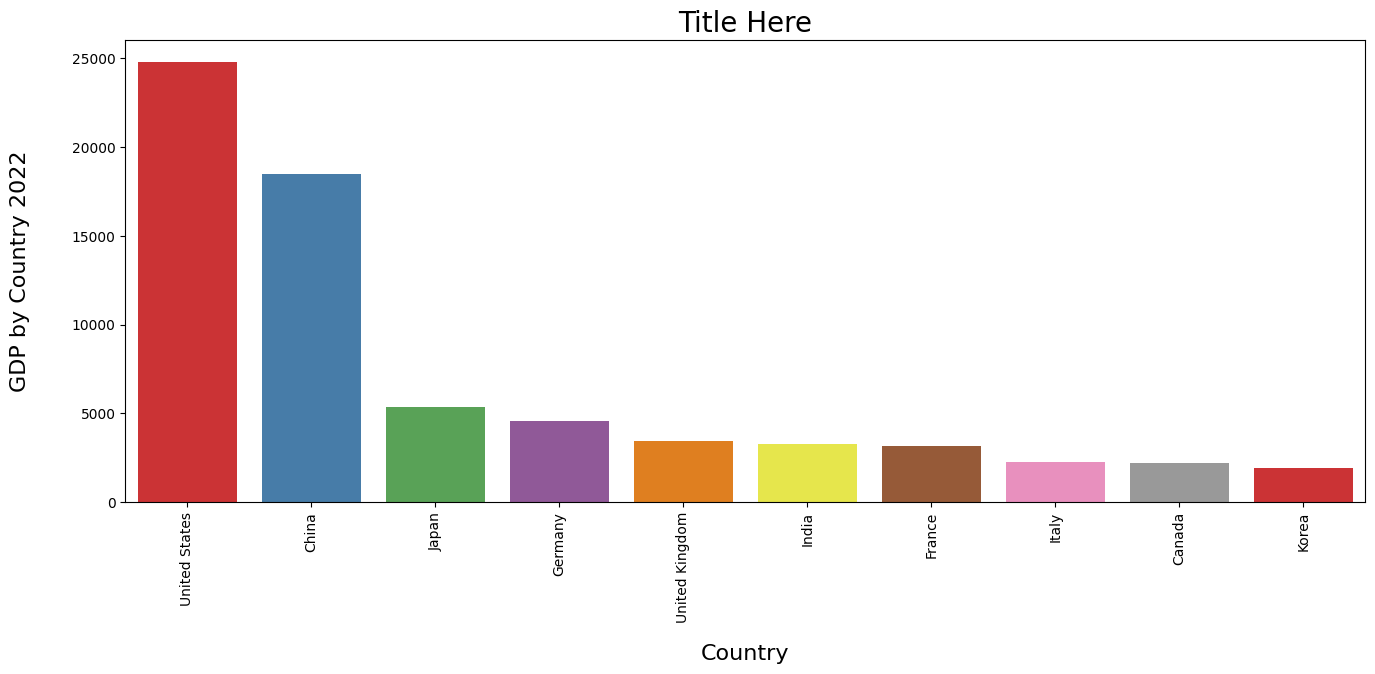

In [198]:
#Top 10 GDP in 2022
top_10_GDP_2022 = data.sort_values('2022', ascending = False).head(10)
fig, ax = pyplot.subplots(figsize = (16, 6))
sns.barplot(x = 'Country', y = '2022', data = top_10_GDP_2022, palette = 'Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad= 15)
ax.set_ylabel('GDP by Country 2022', labelpad= 30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
pyplot.xticks(rotation = 90)
pyplot.title('Title Here', fontsize = 20)
pyplot.show()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
171,United States,9268.430,9816.98,10127.95,10469.60,10960.75,11712.48,12455.83,13244.55,13770.31,14418.48,14266.20,14704.21,16008.51,16729.38,17419.35,17968.20,18697.92,19555.87,20493.25,21404.19,22294.11,22939.58,24796.08
81,Japan,4384.270,4668.79,4097.96,3925.11,4234.92,4608.14,4557.12,4367.46,4302.09,4453.39,5048.63,5187.46,5410.70,5591.43,5791.63,4116.24,4170.64,4342.16,4446.33,4590.91,4746.88,5103.11,5383.68
61,Germany,2146.430,1905.80,1892.60,2024.06,2444.28,2744.22,2791.74,2897.03,3080.55,3184.13,3235.46,3325.76,3397.87,3443.06,3485.90,3371.00,3472.51,3595.41,3721.37,3846.70,4004.94,4230.17,4557.35
170,United Kingdom,1467.030,1445.19,1435.63,1574.47,1814.64,2155.16,2230.61,2373.69,2660.66,2822.66,2198.16,2353.03,2611.27,2758.80,2919.12,2864.90,3054.84,3232.28,3425.54,3616.82,3851.98,3108.42,3442.21
74,India,440.760,461.329,473.867,494.848,576.547,667.342,780.784,886.867,984.21,1079.90,1242.64,1339.49,1583.43,1740.41,1908.33,2182.58,2384.73,2607.41,2846.16,3131.95,3443.60,2946.06,3250.08
106,Mexico,480.593,580.791,621.859,648.629,638.745,683.486,767.69,840.012,897.315,951.733,866.336,952.575,1097.85,1186.61,1273.56,1161.48,1187.05,1251.25,1322.92,1404.92,1495.66,1285.52,1371.64


C:\Users\kayla\AppData\Local\Temp\ipykernel_10128\4087875415.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Country', y = '2022', data = Countries_GDP_2022, legend=False, palette = 'Set1')


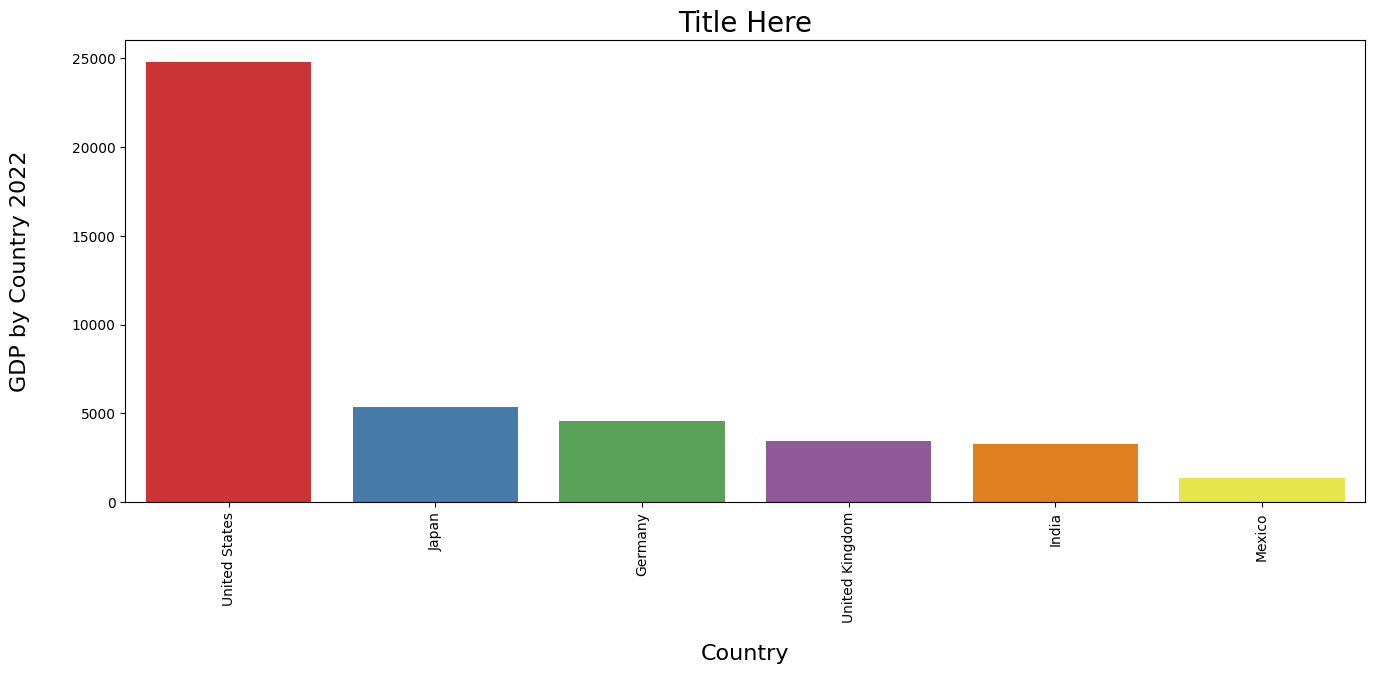

In [211]:
#2022 GDP for germany, south korea, UK, US, Mexico, japan and india

Countries = data[data["Country"].isin(['Germany', 'South Korea', 'United Kingdom', 'United States', 'Mexico', 'Japan', 'India'])] 
Countries_GDP_2022 = Countries.sort_values('2022', ascending = False)

display(Countries_GDP_2022)

fig, ax = pyplot.subplots(figsize = (16, 6))
sns.barplot(x = 'Country', y = '2022', data = Countries_GDP_2022, legend=False, palette = 'Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad= 15)
ax.set_ylabel('GDP by Country 2022', labelpad= 30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
pyplot.xticks(rotation = 90)
pyplot.title('Title Here', fontsize = 20)
pyplot.show()

,Country,Year,GDP
0,Germany,2018,3721.37
1,India,2018,2846.16
2,Japan,2018,4446.33
3,Mexico,2018,1322.92
4,United Kingdom,2018,3425.54
5,United States,2018,20493.25
6,Germany,2019,3846.70
7,India,2019,3131.95
8,Japan,2019,4590.91
9,Mexico,2019,1404.92


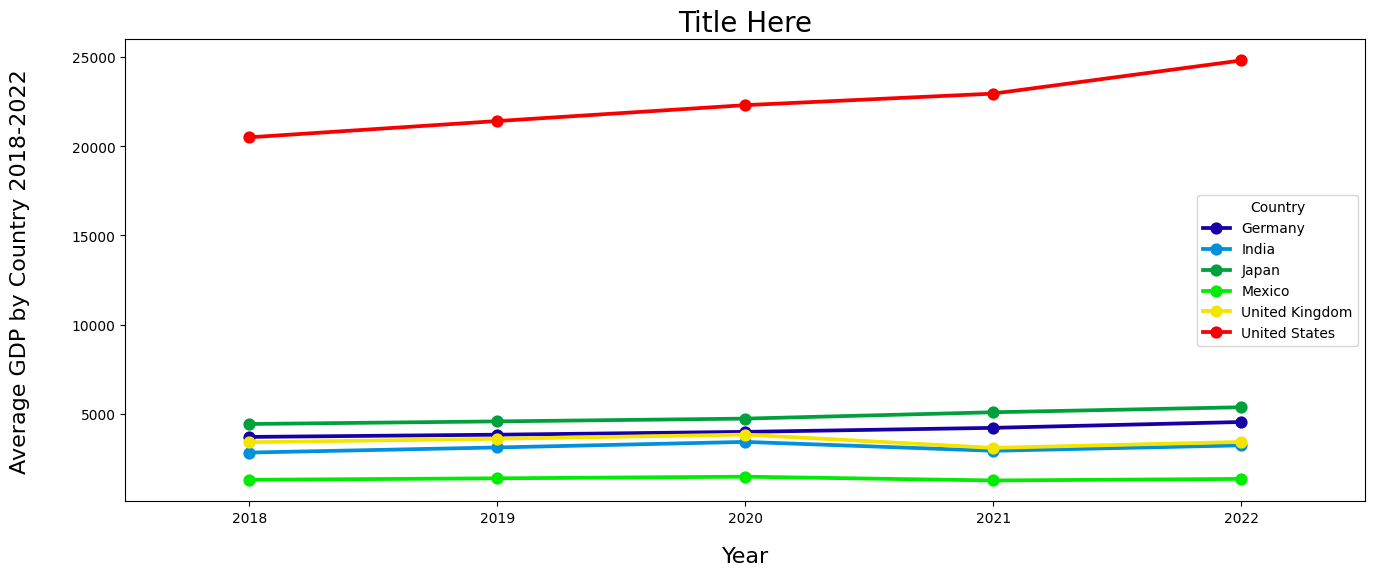

In [284]:
#Average GDP between 2018-2022 for germany, south korea, UK, US, Mexico, japan and india
Countries = data[data["Country"].isin(['Germany', 'South Korea', 'United Kingdom', 'United States', 'Mexico', 'Japan', 'India'])] 
Countries_GDP_2022 = Countries[['Country', '2018', '2019', '2020', '2021', '2022']]

fig, ax = pyplot.subplots(figsize = (16, 6))
new_data = pd.melt(Countries_GDP_2022, id_vars = ['Country'], value_vars = ['2018', '2019', '2020', '2021', '2022'], var_name = 'Year', value_name = 'GDP')

new_data = new_data.astype({'Country' : 'str'})
new_data = new_data.astype({'GDP' : 'float'})

#sort_new_data = new_data.sort_values('GDP', ascending = True)
#sort_new_data = resort_new_data.sort_values('GDP', ascending = True)

display(new_data)

sns.pointplot(data = new_data, x = 'Year', y = 'GDP', hue = 'Country', ax = ax, palette = 'nipy_spectral')

ax.set_xlabel(ax.get_xlabel(), labelpad= 15)
ax.set_ylabel('Average GDP by Country 2018-2022', labelpad= 30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
pyplot.title('Title Here', fontsize = 20)
pyplot.show()

,Country,Year,GDP
0,Germany,2018,3721.37
1,India,2018,2846.16
2,Japan,2018,4446.33
3,Mexico,2018,1322.92
4,United Kingdom,2018,3425.54
5,Germany,2019,3846.70
6,India,2019,3131.95
7,Japan,2019,4590.91
8,Mexico,2019,1404.92
9,United Kingdom,2019,3616.82


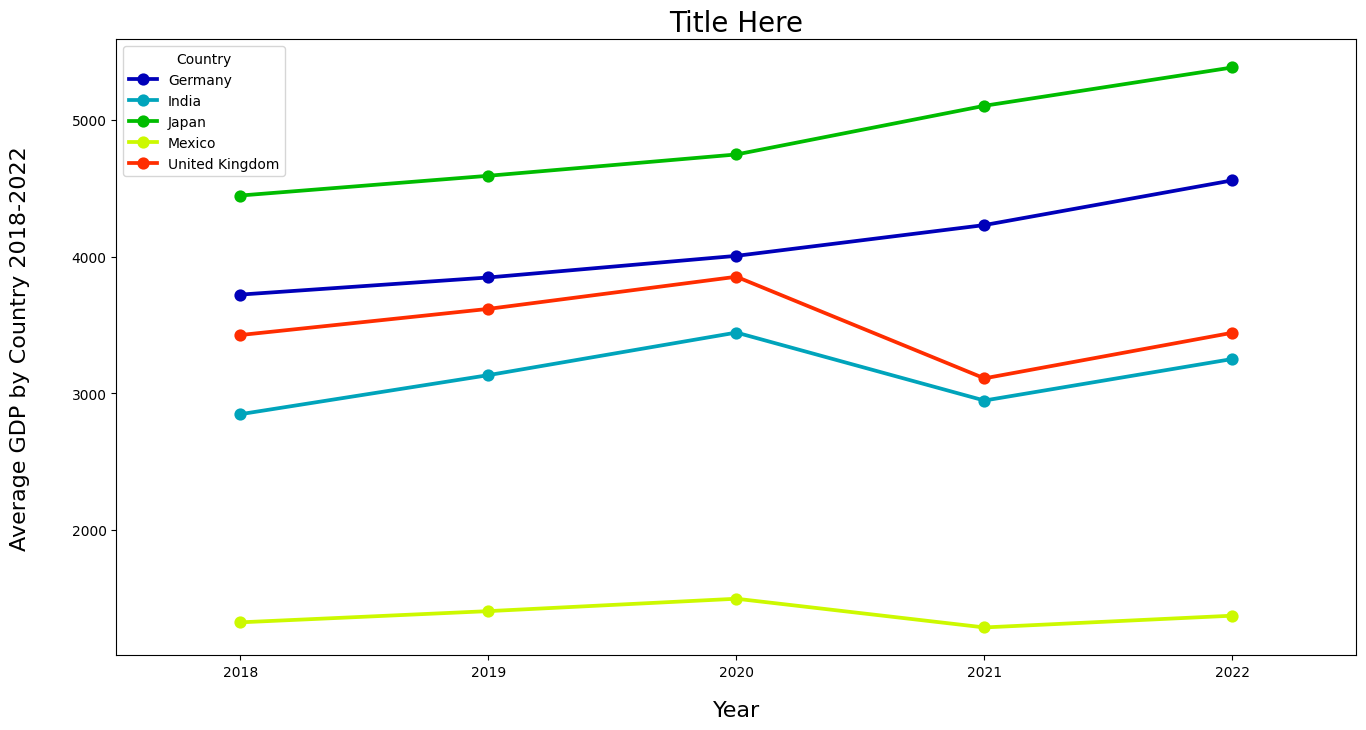

In [286]:
#Average GDP between 2018-2022 for germany, south korea, UK, Mexico, japan and india ***Without the US because it made the graph look bad***
Countries = data[data["Country"].isin(['Germany', 'South Korea', 'United Kingdom', 'Mexico', 'Japan', 'India'])] 
Countries_GDP_2022 = Countries[['Country', '2018', '2019', '2020', '2021', '2022']]

fig, ax = pyplot.subplots(figsize = (16, 8))
new_data = pd.melt(Countries_GDP_2022, id_vars = ['Country'], value_vars = ['2018', '2019', '2020', '2021', '2022'], var_name = 'Year', value_name = 'GDP')

new_data = new_data.astype({'Country' : 'str'})
new_data = new_data.astype({'GDP' : 'float'})

#sort_new_data = new_data.sort_values('GDP', ascending = True)
#sort_new_data = resort_new_data.sort_values('GDP', ascending = True)

display(new_data)

sns.pointplot(data = new_data, x = 'Year', y = 'GDP', hue = 'Country', ax = ax, palette = 'nipy_spectral')

ax.set_xlabel(ax.get_xlabel(), labelpad= 15)
ax.set_ylabel('Average GDP by Country 2018-2022', labelpad= 30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
pyplot.title('Title Here', fontsize = 20)
pyplot.show()